In [2]:
import h5py
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob, os
import datetime as dt
import cv2
from scipy.signal import find_peaks, peak_prominences

In [270]:
video = 'MC71_6-4-19_L2_crossing4_patternD_light1'
videopath = "/home/ml/Documents/TADSS_Videos/MC71/cut/"+video+".mp4"
filepath = "/home/ml/Documents/TADSS_Videos/MC71/cut/dlc_output_16-810/"+video+"_DLC_resnet101_LadderWalkFeb13shuffle1_1030000.h5"
df = pd.read_hdf(filepath)

In [271]:
df

scorer    DLC_resnet101_LadderWalkFeb13shuffle1_1030000              \
bodyparts                                          nose               
coords                                                x           y   
0                                           1349.281250  666.267334   
1                                           1349.323120  666.230408   
2                                           1329.732788  657.710388   
3                                           1302.590454  662.579346   
4                                           1282.505981  656.660950   
..                                                  ...         ...   
98                                           324.786469  669.651917   
99                                           305.956848  669.436646   
100                                          288.431732  675.965515   
101                                          276.094635  674.203552   
102                                          264.536560  667.686340   

scorer                                                                 \
bodyparts               right eye                            left eye   
coords    likelihood            x           y likelihood            x   
0                1.0  1374.513184  621.160095   0.002515  1372.767700   
1                1.0  1374.541626  621.217102   0.002299  1372.789551   
2                1.0  1356.104126  614.518860   0.013684  1354.240967   
3                1.0  1334.694946  621.468445   0.014384  1332.014526   
4                1.0  1312.687988  612.690613   0.022279  1308.768555   
..               ...          ...         ...        ...          ...   
98               1.0   350.775879  638.307861   0.026435   347.626770   
99               1.0   330.946198  640.450439   0.016740   328.461975   
100              1.0   310.239197  644.115295   0.027010   307.674377   
101              1.0   295.658447  641.007690   0.035610   293.067444   
102              1.0   284.272156  636.184937   0.019730   281.558899   

scorer                                         ...                          \
bodyparts                            shoulder  ... right toes   left ankle   
coords              y likelihood            x  ... likelihood            x   
0          624.403076   0.999964  1464.870483  ...   0.999410  1591.969238   
1          624.471497   0.999963  1464.830566  ...   0.999398  1591.990723   
2          615.705383   0.999998  1447.703369  ...   0.986249  1587.451050   
3          623.103516   0.999999  1426.590332  ...   0.997653  1583.880249   
4          613.916382   0.999999  1403.093872  ...   0.990923  1578.887085   
..                ...        ...          ...  ...        ...          ...   
98         639.577454   0.999998   448.865479  ...   0.999938   596.580078   
99         641.554199   0.999998   423.726929  ...   0.000531   524.022217   
100        645.674927   1.000000   395.894470  ...   0.000925   508.207458   
101        642.254822   1.000000   379.393127  ...   0.001323   505.854309   
102        636.711548   0.999976   370.059814  ...   0.004481   505.055511   

scorer                                                                \
bodyparts                           left toes                          
coords              y likelihood            x           y likelihood   
0          656.782959   0.998778  1567.997192  664.333008   0.994622   
1          656.768066   0.998923  1568.008789  664.346436   0.994902   
2          655.598450   0.999983  1568.235229  665.661987   0.999895   
3          654.349426   0.999977  1566.283936  664.392151   0.999913   
4          651.609192   0.999990  1561.460571  663.008728   0.999961   
..                ...        ...          ...         ...        ...   
98         684.709595   0.999360   483.245056  695.409607   0.364647   
99         686.684631   0.999999   479.899139  696.115356   0.999381   
100        692.598328   1.000000   476.354126  699.231628   0.999992   
101        690.767883   1

In [272]:
#split by limb
#frontright
df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
#frontleft
df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
#backright
df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
#frontleft
df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']

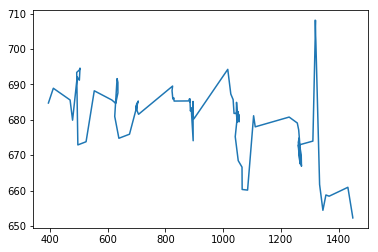

In [273]:
plt.plot(df_flw['x'],df_flw['y'])

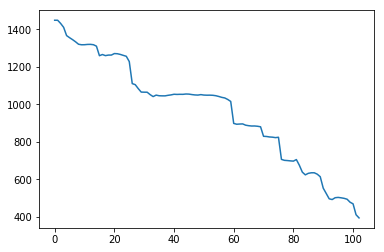

In [274]:
from scipy.signal import lfilter
b = [1.0 / 2] * 2
plt.plot(df_flw.index,df_flw['x'])
#plt.plot(df_flw.index,lfilter(b,1,df_flw['x']))

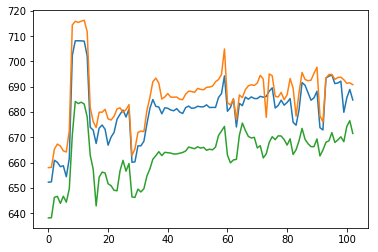

In [275]:
plt.plot(df_flw.index,df_flw['y'])
plt.plot(df_flf.index,df_flf['y'])
plt.plot(df_fle.index,df_fle['y'])

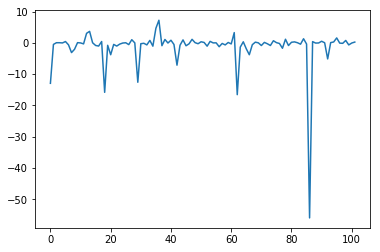

In [276]:
x=df_flw['x']
y=df_flw['y']
dydx = np.diff(y)/np.diff(x)
plt.plot(dydx)

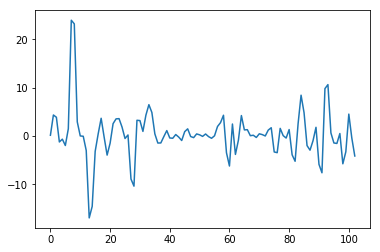

In [277]:
plt.plot(np.gradient(df_flw['y']))

In [278]:
grad_y = np.gradient(df_flw['y'])
fix = []
for i in range(len(grad_y)):
    if grad_y[i] <=-2:
        fix.append(i)
print(fix)

[12, 13, 14, 15, 19, 27, 28, 59, 60, 62, 75, 76, 81, 82, 86, 87, 90, 91, 98, 99, 102]


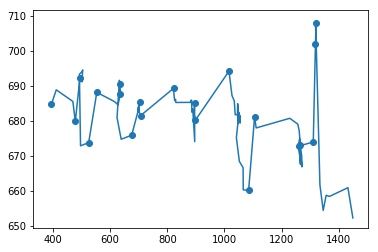

In [279]:
#plt.plot(np.gradient(df_flw['y'])+680)
plt.plot(df_flw['x'],df_flw['y'])
plt.scatter(df_flw['x'][fix],df_flw['y'][fix])

In [280]:
df_flw_filter = pd.DataFrame()
df_flw_filter['x']=df_flw['x']
df_flw_filter['y']=df_flw['y']
df_flw_filter['y'].iloc[fix] = np.nan
df_flw_filter['y'] = (df_flw_filter['y'].ffill()+df_flw_filter['y'].bfill())/2

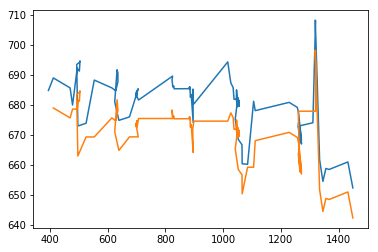

In [281]:
plt.plot(df_flw['x'],df_flw['y'])
plt.plot(df_flw_filter['x'],df_flw_filter['y']-10)

[12, 13, 14, 15, 19, 27, 28, 59, 60, 62, 75, 76, 81, 82, 86, 87, 90, 91, 98, 99, 102]


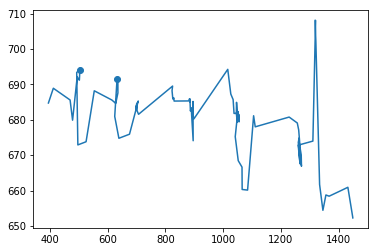

In [282]:
grad_x = np.gradient(df_flw['x'])
fix_x = []
for i in range(len(grad_x)):
    if grad_x[i] >=5:
        fix_x.append(i)
print(fix)
#plt.plot(np.gradient(df_flw['y'])+680)
plt.plot(df_flw['x'],df_flw['y'])
plt.scatter(df_flw['x'][fix_x],df_flw['y'][fix_x])

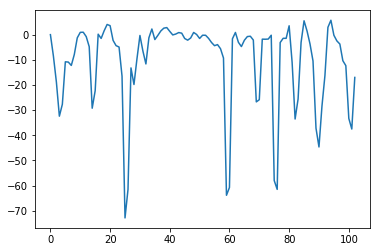

In [283]:
plt.plot(grad_x)

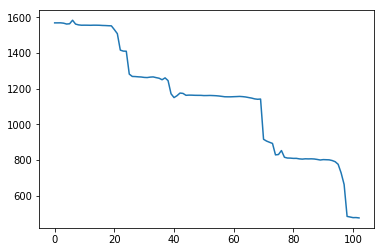

In [284]:
plt.plot(df_blt['x'])

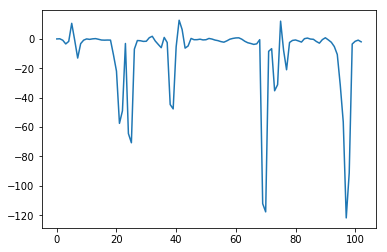

In [285]:
plt.plot(np.gradient(df_blt['x']))

In [286]:
#find fps
cam = cv2.VideoCapture(videopath)
fps = cam.get(cv2.CAP_PROP_FPS)

In [287]:
fps

23.976023976023978

In [288]:
df_blt['time'] = df_blt.index*1/fps

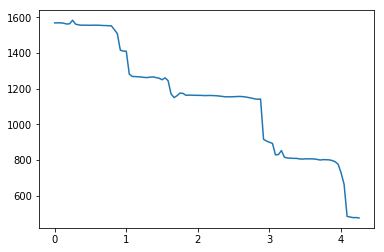

In [289]:
plt.plot(df_blt['time'],df_blt['x'])

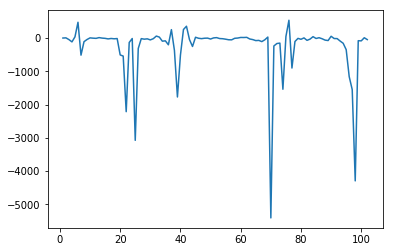

In [290]:
plt.plot(df_blt['x'].diff()/df_blt['time'].diff())

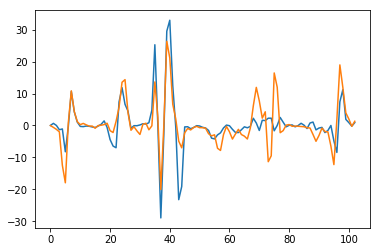

In [291]:
plt.plot(np.gradient(df_blt['y']))
plt.plot(np.gradient(df_bla['y']))

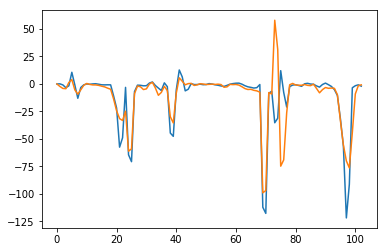

In [292]:
plt.plot(np.gradient(df_blt['x']))
plt.plot(np.gradient(df_bla['x']))

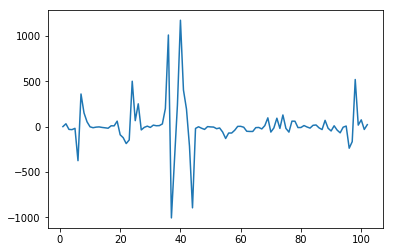

In [293]:
plt.plot(df_blt['y'].diff()/df_blt['time'].diff())

In [294]:
video2 = 'MC71_6-7-19_CATCH_L4_crossing7_patternD_light1'
videopath2 = "/home/ml/Documents/TADSS_Videos/MC71/cut/"+video2+".mp4"
filepath2 = "/home/ml/Documents/TADSS_Videos/MC71/cut/dlc_output_16-810/"+video2+"_DLC_resnet101_LadderWalkFeb13shuffle1_1030000.h5"
df2 = pd.read_hdf(filepath2)

In [295]:
#split by limb
#frontright
df_frw2 = df2['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
df_frf2 = df2['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
df_fre2 = df2['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
#frontleft
df_flw2 = df2['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
df_flf2 = df2['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
df_fle2 = df2['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
#backright
df_bra2 = df2['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
df_brt2 = df2['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
#frontleft
df_bla2 = df2['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
df_blt2 = df2['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']

In [296]:
#find fps
cam2 = cv2.VideoCapture(videopath2)
fps2 = cam2.get(cv2.CAP_PROP_FPS)

In [297]:
df_blt2['time'] = df_blt2.index*1/fps2

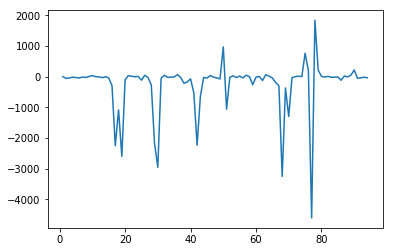

In [298]:
plt.plot(df_blt2['x'].diff()/df_blt2['time'].diff())

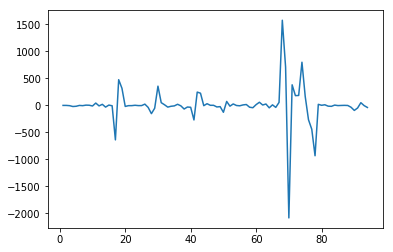

In [299]:
plt.plot(df_blt2['y'].diff()/df_blt2['time'].diff())

In [300]:
df_bla2['time'] = df_blt2.index*1/fps2

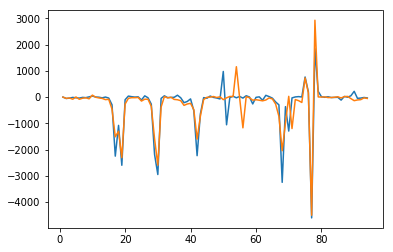

In [301]:
plt.plot(df_blt2['x'].diff()/df_blt2['time'].diff())
plt.plot(df_bla2['x'].diff()/df_bla2['time'].diff())

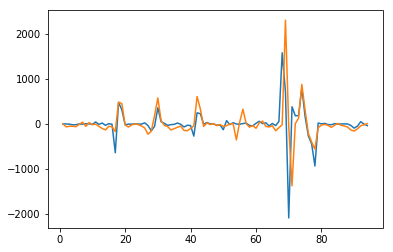

In [302]:
plt.plot(df_blt2['y'].diff()/df_blt2['time'].diff())
plt.plot(df_bla2['y'].diff()/df_bla2['time'].diff())

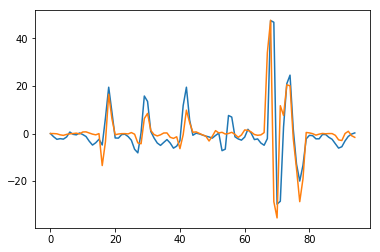

In [303]:
plt.plot(np.gradient(df_bla2['y']))
plt.plot(np.gradient(df_blt2['y']))


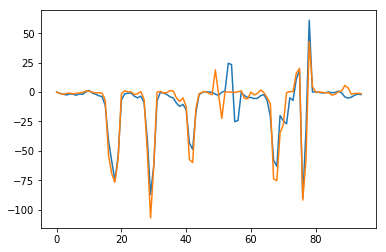

In [304]:
plt.plot(np.gradient(df_bla2['x']))
plt.plot(np.gradient(df_blt2['x']))


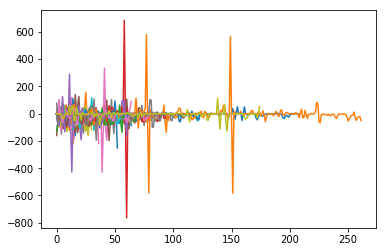

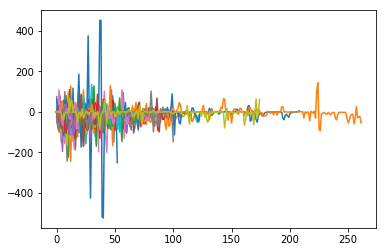

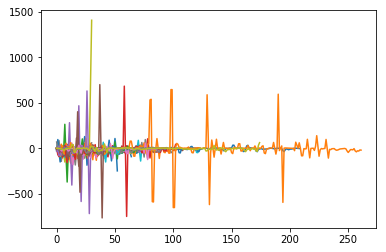

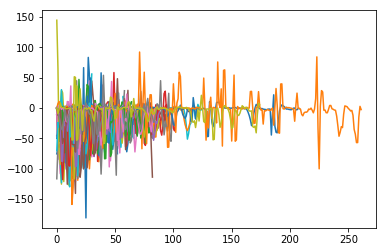

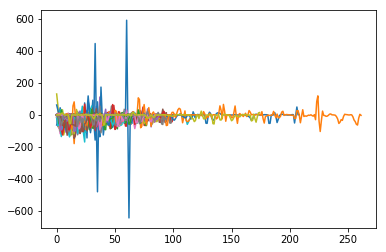

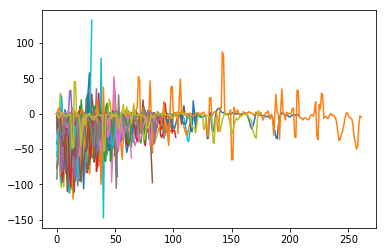

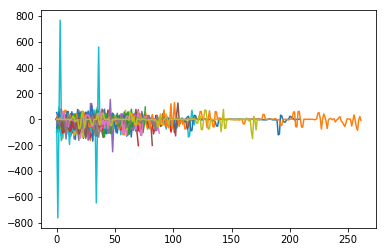

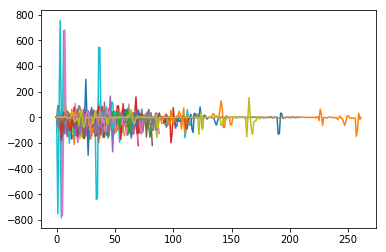

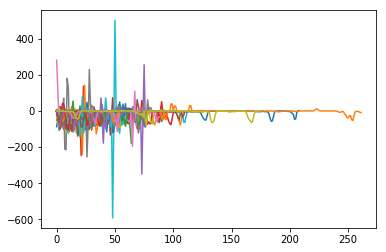

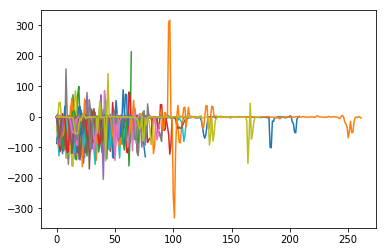

In [357]:
folder = glob.glob("/home/ml/Documents/TADSS_Videos/MC71/cut/dlc_output_16-810/*.h5")
fig_rw=plt.figure()
fig_rf=plt.figure()
fig_re=plt.figure()
fig_lw=plt.figure()
fig_lf=plt.figure()
fig_le=plt.figure()
fig_ra=plt.figure()
fig_rt=plt.figure()
fig_la=plt.figure()
fig_lt=plt.figure()
ax1=fig_rw.add_subplot(111)
ax2=fig_rf.add_subplot(111)
ax3=fig_re.add_subplot(111)
ax4=fig_lw.add_subplot(111)
ax5=fig_lf.add_subplot(111)
ax6=fig_le.add_subplot(111)
ax7=fig_ra.add_subplot(111)
ax8=fig_rt.add_subplot(111)
ax9=fig_la.add_subplot(111)
ax10=fig_lt.add_subplot(111)
for f in folder:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 10:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']
    
    if list(run)[0]=='L':
        ax1.plot(np.gradient(df_frw['x']))
        ax2.plot(np.gradient(df_frf['x']))
        ax3.plot(np.gradient(df_fre['x']))
        ax4.plot(np.gradient(df_flw['x']))
        ax5.plot(np.gradient(df_flf['x']))
        ax6.plot(np.gradient(df_fle['x']))
        ax7.plot(np.gradient(df_bra['x']))
        ax8.plot(np.gradient(df_brt['x']))
        ax9.plot(np.gradient(df_bla['x']))
        ax10.plot(np.gradient(df_blt['x']))
    else:
        '''ax1.plot(-1*np.gradient(df_frw['x']))
        ax2.plot(-1*np.gradient(df_frf['x']))
        ax3.plot(-1*np.gradient(df_fre['x']))
        ax4.plot(-1*np.gradient(df_flw['x']))
        ax5.plot(-1*np.gradient(df_flf['x']))
        ax6.plot(-1*np.gradient(df_fle['x']))
        ax7.plot(-1*np.gradient(df_bra['x']))
        ax8.plot(-1*np.gradient(df_brt['x']))
        ax9.plot(-1*np.gradient(df_bla['x']))
        ax10.plot(-1*np.gradient(df_blt['x']))'''
plt.show()
plt.close()
    

['L', '1']

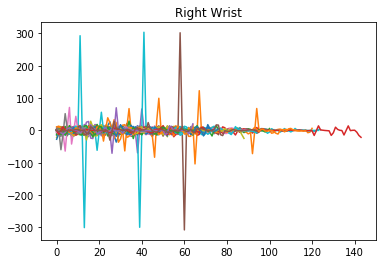

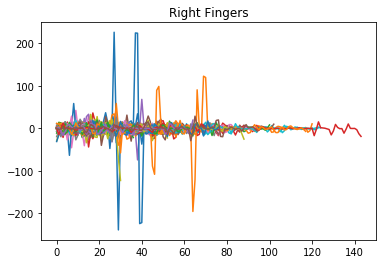

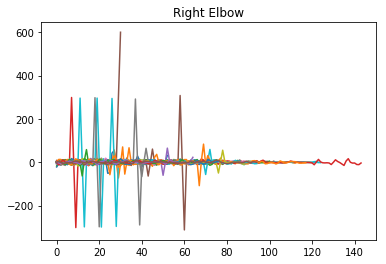

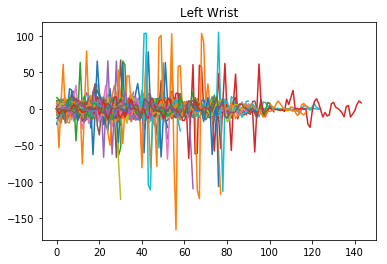

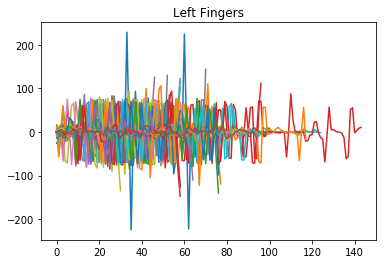

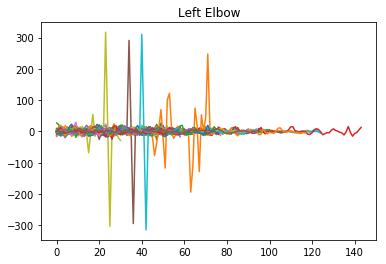

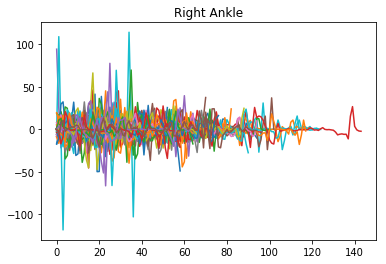

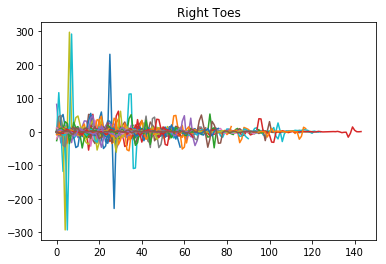

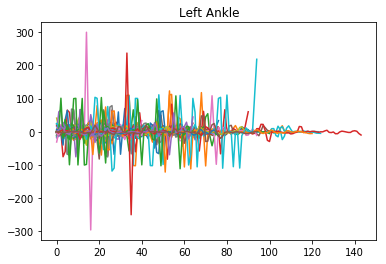

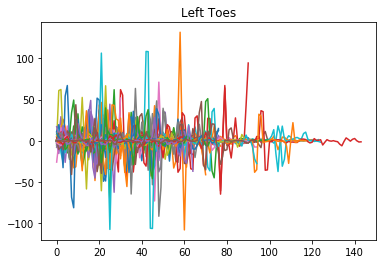

In [318]:
folder = glob.glob("/home/ml/Documents/TADSS_Videos/MC71/cut/dlc_output_16-810/*.h5")
fig_rw=plt.figure()
fig_rf=plt.figure()
fig_re=plt.figure()
fig_lw=plt.figure()
fig_lf=plt.figure()
fig_le=plt.figure()
fig_ra=plt.figure()
fig_rt=plt.figure()
fig_la=plt.figure()
fig_lt=plt.figure()
ax1=fig_rw.add_subplot(111)
ax2=fig_rf.add_subplot(111)
ax3=fig_re.add_subplot(111)
ax4=fig_lw.add_subplot(111)
ax5=fig_lf.add_subplot(111)
ax6=fig_le.add_subplot(111)
ax7=fig_ra.add_subplot(111)
ax8=fig_rt.add_subplot(111)
ax9=fig_la.add_subplot(111)
ax10=fig_lt.add_subplot(111)

ax1.set_title("Right Wrist")
ax2.set_title("Right Fingers")
ax3.set_title("Right Elbow")
ax4.set_title("Left Wrist")
ax5.set_title("Left Fingers")
ax6.set_title("Left Elbow")
ax7.set_title("Right Ankle")
ax8.set_title("Right Toes")
ax9.set_title("Left Ankle")
ax10.set_title("Left Toes")
for f in folder:
    df = pd.read_hdf(f)
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']

    ax1.plot(np.gradient(df_frw['y']))
    ax2.plot(np.gradient(df_frf['y']))
    ax3.plot(np.gradient(df_fre['y']))
    ax4.plot(np.gradient(df_flw['y']))
    ax5.plot(np.gradient(df_flf['y']))
    ax6.plot(np.gradient(df_fle['y']))
    ax7.plot(np.gradient(df_bra['y']))
    ax8.plot(np.gradient(df_brt['y']))
    ax9.plot(np.gradient(df_bla['y']))
    ax10.plot(np.gradient(df_blt['y']))
plt.show()
plt.close()
    

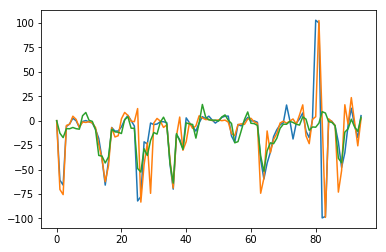

In [320]:
plt.plot(np.gradient(df_frw['x']))
plt.plot(np.gradient(df_frf['x']))
plt.plot(np.gradient(df_fre['x']))
#plt.plot(np.gradient(df_flw['y']))
#plt.plot(np.gradient(df_flf['y']))
#plt.plot(np.gradient(df_fle['y']))
##plt.plot(np.gradient(df_bra['y']))
#plt.plot(np.gradient(df_brt['y']))
#plt.plot(np.gradient(df_bla['y']))
#plt.plot(np.gradient(df_blt['y']))
    

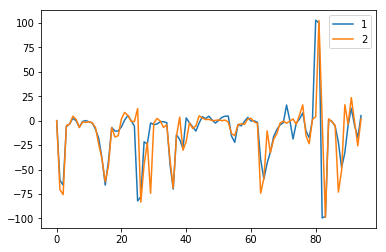

In [339]:
plt.plot(np.gradient(df_frw['x']),label='1')
plt.plot(np.gradient(df_frf['x']),label='2')
#plt.plot(np.gradient(df_frw['x'])-np.gradient(df_frf['x']),label='diff')
plt.legend()

In [330]:
np.gradient(df_fre['x'])-np.gradient(df_fre['x'])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [358]:
name

'MC71_6-4-19_L1_crossing2_patternD_light1_DLC_resnet101_LadderWalkFeb13shuffle1_1030000.h5'

In [387]:
#y direction
folder = glob.glob("/home/ml/Documents/TADSS_Videos/MC71/cut/dlc_output_16-810/*.h5")
for f in folder:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 10:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']
    
    peaks_frw = find_peaks(-1*np.gradient(df_frw['y']),height=5)
    slips_frw = find_peaks(np.gradient(df_frw['y']),height=5)
    peaklist = peaks_frw[0]
    sliplist = slips_frw[0]
    
    plt.plot(np.gradient(df_frw['y']))
    plt.scatter(peaklist,np.gradient(df_frw['y'])[peaklist],label='steps')
    plt.scatter(sliplist,np.gradient(df_frw['y'])[sliplist],label='slips')
    
    plt.title(name.split("_")[0]+" "+name.split("_")[1]+" "+name.split("_")[2]+" Y Velocity")
    plt.ylabel("Change in Y")
    plt.xlabel("Frame Number")
    
    plt.text(0,15,"Steps: "+str(len(peaklist))+"\n Slips: "+str(len(sliplist)))
    plt.legend()
    
    plt.savefig("/home/ml/Documents/y_velocity_peaks/"+name+".png")
    
    plt.close()
    

In [388]:
#x direction
folder = glob.glob("/home/ml/Documents/TADSS_Videos/MC71/cut/dlc_output_16-810/*.h5")
for f in folder:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 10:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']
    
    
    if list(run)[0]=='L':
        peaks_frw = find_peaks(-1*np.gradient(df_frw['x']),height=30)
        slips_frw = find_peaks(np.gradient(df_frw['x']),height=30)
    else:
        peaks_frw = find_peaks(np.gradient(df_frw['x']),height=30)
        slips_frw = find_peaks(-1*np.gradient(df_frw['x']),height=30)
    peaklist = peaks_frw[0]
    sliplist = slips_frw[0]
    
    plt.plot(np.gradient(df_frw['x']))
    plt.scatter(peaklist,np.gradient(df_frw['x'])[peaklist],label='steps')
    plt.scatter(sliplist,np.gradient(df_frw['x'])[sliplist],label='slips')
    
    plt.title(name.split("_")[0]+" "+name.split("_")[1]+" "+name.split("_")[2]+" X Velocity")
    plt.ylabel("Change in X")
    plt.xlabel("Frame Number")
    
    plt.text(0,15,"Steps: "+str(len(peaklist))+"\n Slips: "+str(len(sliplist)))
    plt.legend()
    
    plt.savefig("/home/ml/Documents/x_velocity_peaks/"+name+".png")
    
    plt.close()
    

In [40]:
#x direction
folder = glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC70/cut/dlc_output_16-810/*.h5")
for f in folder:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 9:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']
    
    
    if list(run)[0]=='L':
        peaks_frw = find_peaks(-1*np.gradient(df_frw['x']),height=30,distance=5)
        slips_frw = find_peaks(np.gradient(df_frw['x']),height=30,distance=5)
    else:
        peaks_frw = find_peaks(np.gradient(df_frw['x']),height=30,distance=5)
        slips_frw = find_peaks(-1*np.gradient(df_frw['x']),height=30,distance=5)
    peaklist_frw = peaks_frw[0]
    sliplist_frw = slips_frw[0]
    
    plt.plot(np.gradient(df_frw['x']))
    plt.scatter(peaklist_frw,np.gradient(df_frw['x'])[peaklist_frw],label='forward',color='b')
    plt.scatter(sliplist_frw,np.gradient(df_frw['x'])[sliplist_frw],label='backward',color='r')
    
    if list(run)[0]=='L':
        peaks_frf = find_peaks(-1*np.gradient(df_frf['x']),height=30,distance=5)
        slips_frf = find_peaks(np.gradient(df_frf['x']),height=30,distance=5)
    else:
        peaks_frf = find_peaks(np.gradient(df_frf['x']),height=30,distance=5)
        slips_frf = find_peaks(-1*np.gradient(df_frf['x']),height=30,distance=5)
    peaklist_frf = peaks_frf[0]
    sliplist_frf = slips_frf[0]
    
    plt.plot(np.gradient(df_frf['x']))
    plt.scatter(peaklist_frf,np.gradient(df_frf['x'])[peaklist_frf],color='b')
    plt.scatter(sliplist_frf,np.gradient(df_frf['x'])[sliplist_frf],color='r')
    
    plt.title(name.split("_")[0]+" "+name.split("_")[1]+" "+name.split("_")[2]+" X Velocity")
    plt.ylabel("Change in X")
    plt.xlabel("Frame Number")
    
    plt.text(0,plt.gca().get_ylim()[1],"Forward: "+str(len(peaklist_frf))+"\n"+"Backward: "+str(len(sliplist_frf)))
    plt.legend()
    
    plt.savefig("/home/ml/Documents/mc70_x_velocity_peaks/"+name+".png")
    
    plt.close()
    

In [38]:
#y direction
folder = glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC70/cut/dlc_output_16-810/*.h5")
for f in folder:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 10:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']
    
    peaks_frw = find_peaks(-1*np.gradient(df_frw['y']),height=5,distance=5)
    slips_frw = find_peaks(np.gradient(df_frw['y']),height=5,distance=5)
    peaklist_frw = peaks_frw[0]
    sliplist_frw = slips_frw[0]
    
    plt.plot(np.gradient(df_frw['y']))
    plt.scatter(peaklist_frw,np.gradient(df_frw['y'])[peaklist_frw],label='up',color='b')
    plt.scatter(sliplist_frw,np.gradient(df_frw['y'])[sliplist_frw],label='down',color='r')
    
    peaks_frf = find_peaks(-1*np.gradient(df_frf['y']),height=5,distance=5)
    slips_frf = find_peaks(np.gradient(df_frf['y']),height=5,distance=5)
    peaklist_frf = peaks_frf[0]
    sliplist_frf = slips_frf[0]
    
    plt.plot(np.gradient(df_frf['y']))
    plt.scatter(peaklist_frf,np.gradient(df_frf['y'])[peaklist_frf],color='b')
    plt.scatter(sliplist_frf,np.gradient(df_frf['y'])[sliplist_frf],color='r')
    
    plt.title(name.split("_")[0]+" "+name.split("_")[1]+" "+name.split("_")[2]+" Y Velocity")
    plt.ylabel("Change in Y")
    plt.xlabel("Frame Number")
    
    plt.text(0,plt.gca().get_ylim()[1],"Up: "+str(len(peaklist_frf))+"\n"+ "Down: "+str(len(sliplist_frf)))
    plt.legend()
    
    plt.savefig("/home/ml/Documents/mc70_y_velocity_peaks/"+name+".png")
    
    plt.close()
    

In [51]:
#x direction
folder = glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/*.h5")
for f in folder:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 9:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']
    
    
    if list(run)[0]=='L':
        peaks_frw = find_peaks(-1*np.gradient(df_frw['x']),height=30,distance=5)
        slips_frw = find_peaks(np.gradient(df_frw['x']),height=30,distance=5)
    else:
        peaks_frw = find_peaks(np.gradient(df_frw['x']),height=30,distance=5)
        slips_frw = find_peaks(-1*np.gradient(df_frw['x']),height=30,distance=5)
    peaklist_frw = peaks_frw[0]
    sliplist_frw = slips_frw[0]
    
    plt.figure(figsize=(20,10))
    plt.plot(np.gradient(df_frw['x']), marker='o', markersize=3)
    plt.scatter(peaklist_frw,np.gradient(df_frw['x'])[peaklist_frw],label='forward progress',color='b')
    plt.scatter(sliplist_frw,np.gradient(df_frw['x'])[sliplist_frw],label='backward progress',color='r')
    
    if list(run)[0]=='L':
        peaks_frf = find_peaks(-1*np.gradient(df_frf['x']),height=30,distance=5)
        slips_frf = find_peaks(np.gradient(df_frf['x']),height=30,distance=5)
    else:
        peaks_frf = find_peaks(np.gradient(df_frf['x']),height=30,distance=5)
        slips_frf = find_peaks(-1*np.gradient(df_frf['x']),height=30,distance=5)
    peaklist_frf = peaks_frf[0]
    sliplist_frf = slips_frf[0]
    
    plt.plot(np.gradient(df_frf['x']), marker='o', markersize=3)
    plt.scatter(peaklist_frf,np.gradient(df_frf['x'])[peaklist_frf],color='b')
    plt.scatter(sliplist_frf,np.gradient(df_frf['x'])[sliplist_frf],color='r')
    
    plt.title(name.split("_")[0]+" "+name.split("_")[1]+" "+name.split("_")[2]+" X Velocity")
    plt.ylabel("X Velocity (px/frame)")
    plt.xlabel("Frame Number")
    
    plt.text(0,plt.gca().get_ylim()[1],"Forward: "+str(len(peaklist_frf))+"\n"+"Backward: "+str(len(sliplist_frf)))
    plt.legend()
    
    plt.savefig("/home/ml/Documents/mc30_x_velocity_peaks/"+"x_vel_"+name+".png")
    
    plt.close()
    

In [61]:
#y direction
folder = glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/*.h5")
for f in folder:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 10:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']
    
    peaks_frw = find_peaks(-1*np.gradient(df_frw['y']),height=5,distance=5)
    slips_frw = find_peaks(np.gradient(df_frw['y']),height=5,distance=5)
    peaklist_frw = peaks_frw[0]
    sliplist_frw = slips_frw[0]
    
    plt.figure(figsize=(20,10))
    plt.plot(np.gradient(df_frw['y']), marker='o', markersize=3)
    plt.scatter(peaklist_frw,np.gradient(df_frw['y'])[peaklist_frw],label='upward movement',color='b')
    plt.scatter(sliplist_frw,np.gradient(df_frw['y'])[sliplist_frw],label='downward movement',color='r')
    
    peaks_frf = find_peaks(-1*np.gradient(df_frf['y']),height=5,distance=5)
    slips_frf = find_peaks(np.gradient(df_frf['y']),height=5,distance=5)
    peaklist_frf = peaks_frf[0]
    sliplist_frf = slips_frf[0]
    plt.plot(np.gradient(df_frf['y']), marker='o', markersize=3)
    plt.scatter(peaklist_frf,np.gradient(df_frf['y'])[peaklist_frf],color='b')
    plt.scatter(sliplist_frf,np.gradient(df_frf['y'])[sliplist_frf],color='r')
    
    plt.title(name.split("_")[0]+" "+name.split("_")[1]+" "+name.split("_")[2]+" Y Velocity")
    plt.ylabel("Y Velocity (px/frame)")
    plt.xlabel("Frame Number")
    
    plt.text(0,plt.gca().get_ylim()[1],"Up: "+str(len(peaklist_frf))+"\n"+ "Down: "+str(len(sliplist_frf)))
    plt.legend()
    
    plt.savefig("/home/ml/Documents/mc30_y_velocity_peaks/y_vel_"+name+".png")
    
    plt.close()
    

In [58]:
#x direction
folder = glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/*.h5")
for f in folder:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 9:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']
    
    
    if list(run)[0]=='L':
        peaks_bra = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
        slips_bra = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
    else:
        peaks_bra = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
        slips_bra = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
    peaklist_bra = peaks_bra[0]
    sliplist_bra = slips_bra[0]
    
    plt.figure(figsize=(20,10))
    plt.plot(np.gradient(df_bra['x']), marker='o', markersize=3)
    plt.scatter(peaklist_bra,np.gradient(df_bra['x'])[peaklist_bra],label='forward progress',color='b')
    plt.scatter(sliplist_bra,np.gradient(df_bra['x'])[sliplist_bra],label='backward progress',color='r')
    
    if list(run)[0]=='L':
        peaks_brt = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
        slips_brt = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
    else:
        peaks_brt = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
        slips_brt = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
    peaklist_brt = peaks_brt[0]
    sliplist_brt = slips_brt[0]
    
    plt.plot(np.gradient(df_brt['x']), marker='o', markersize=3)
    plt.scatter(peaklist_brt,np.gradient(df_brt['x'])[peaklist_brt],color='b')
    plt.scatter(sliplist_brt,np.gradient(df_brt['x'])[sliplist_brt],color='r')
    
    plt.title(name.split("_")[0]+" "+name.split("_")[1]+" "+name.split("_")[2]+" X Velocity")
    plt.ylabel("X Velocity (px/frame)")
    plt.xlabel("Frame Number")
    
    plt.text(0,plt.gca().get_ylim()[1],"Forward: "+str(len(peaklist_brt))+"\n"+"Backward: "+str(len(sliplist_brt)))
    plt.legend()
    
    plt.savefig("/home/ml/Documents/mc30_x_velocity_peaks_br/"+"x_vel_br_"+name+".png")
    
    plt.close()
    

In [62]:
#x direction
folder = glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/*.h5")
for f in folder:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 9:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']
    
    peaks_bra = find_peaks(-1*np.gradient(df_bra['y']),height=5,distance=5)
    slips_bra = find_peaks(np.gradient(df_bra['y']),height=5,distance=5)
    peaklist_bra = peaks_bra[0]
    sliplist_bra = slips_bra[0]
    
    plt.figure(figsize=(20,10))
    plt.plot(np.gradient(df_bra['y']), marker='o', markersize=3)
    plt.scatter(peaklist_bra,np.gradient(df_bra['y'])[peaklist_bra],label='up',color='b')
    plt.scatter(sliplist_bra,np.gradient(df_bra['y'])[sliplist_bra],label='down',color='r')
    
    peaks_brt = find_peaks(-1*np.gradient(df_brt['y']),height=5,distance=5)
    slips_brt = find_peaks(np.gradient(df_brt['y']),height=5,distance=5)
    peaklist_brt = peaks_brt[0]
    sliplist_brt = slips_brt[0]
    
    plt.plot(np.gradient(df_brt['y']), marker='o', markersize=3)
    plt.scatter(peaklist_brt,np.gradient(df_brt['y'])[peaklist_brt],color='b')
    plt.scatter(sliplist_brt,np.gradient(df_brt['y'])[sliplist_brt],color='r')
    
    plt.title(name.split("_")[0]+" "+name.split("_")[1]+" "+name.split("_")[2]+" Y Velocity")
    plt.ylabel("Y Velocity (px/frame)")
    plt.xlabel("Frame Number")
    
    plt.text(0,plt.gca().get_ylim()[1],"Forward: "+str(len(peaklist_brt))+"\n"+"Backward: "+str(len(sliplist_brt)))
    plt.legend()
    
    plt.savefig("/home/ml/Documents/mc30_y_velocity_peaks_br/"+"y_vel_br_"+name+".png")
    
    plt.close()
    